In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

In [107]:
df = pd.read_excel("sample.xlsx")

In [108]:
df.head(5)

,No,predictor 1,predictor 2,predictor 3,predictor 4,predictor 5,predictor 6,predictor 7,target
0,1,12423,710,441.5,5,4631.0,D4,B1,1
1,2,13983,1106,NaN,3,4256.0,D5,B1,1
2,3,15520,1276,391.5,1,4397.0,NaN,B1,0
3,4,29535,1106,NaN,1,3772.0,D4,B2,1
4,5,26154,976,315.0,5,2445.0,D3,B1,1


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           10000 non-null  int64  
 1   predictor 1  10000 non-null  int64  
 2   predictor 2  10000 non-null  int64  
 3   predictor 3  8087 non-null   float64
 4   predictor 4  10000 non-null  int64  
 5   predictor 5  10000 non-null  float64
 6   predictor 6  8522 non-null   object 
 7   predictor 7  10000 non-null  object 
 8   target       10000 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [110]:
# Заполнение пропусков
df['predictor 3'].fillna(df['predictor 3'].mean(), inplace = True)
df['predictor 6'].fillna(method='bfill', inplace = True)

In [111]:
# Обработка категориальных переменных
label = LabelEncoder()
df['d_code'] = label.fit_transform(df['predictor 6'])

df['is_b2'] = pd.get_dummies(df['predictor 7'], drop_first=True)

In [112]:
df.head()

,No,predictor 1,predictor 2,predictor 3,predictor 4,predictor 5,predictor 6,predictor 7,target,d_code,is_b2
0,1,12423,710,441.500000,5,4631.0,D4,B1,1,3,0
1,2,13983,1106,368.662174,3,4256.0,D5,B1,1,4,0
2,3,15520,1276,391.500000,1,4397.0,D4,B1,0,3,0
3,4,29535,1106,368.662174,1,3772.0,D4,B2,1,3,1
4,5,26154,976,315.000000,5,2445.0,D3,B1,1,2,0


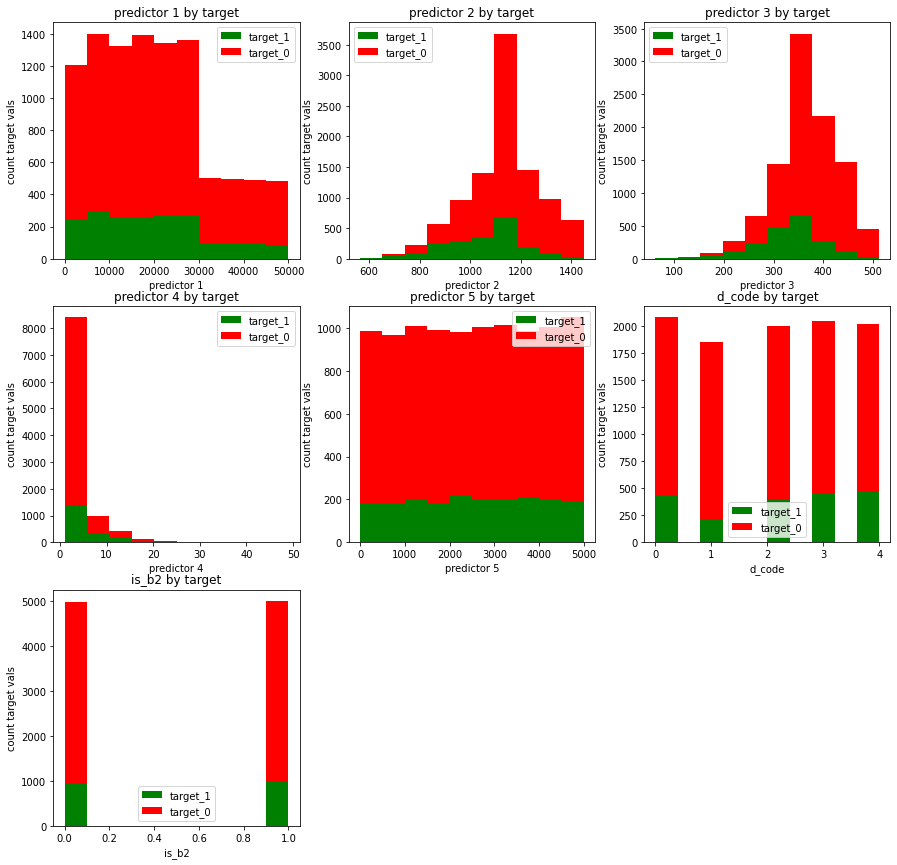

In [113]:
col_list = ['predictor 1', 'predictor 2', 'predictor 3', 'predictor 4', 'predictor 5', 'd_code', 'is_b2']
plt.figure(figsize=(15, 20))

for i, col_name in enumerate(col_list):
    plt.subplot(4, 3, 1 + i)
    plt.hist(x = [df[df['target']==1][col_name], df[df['target']==0][col_name]], 
             stacked=True, color = ['g','r'],label = ['target_1','target_0'])
    plt.title(f'{col_name} by target')
    plt.xlabel(col_name)
    plt.ylabel('count target vals')
    plt.legend()
plt.show();


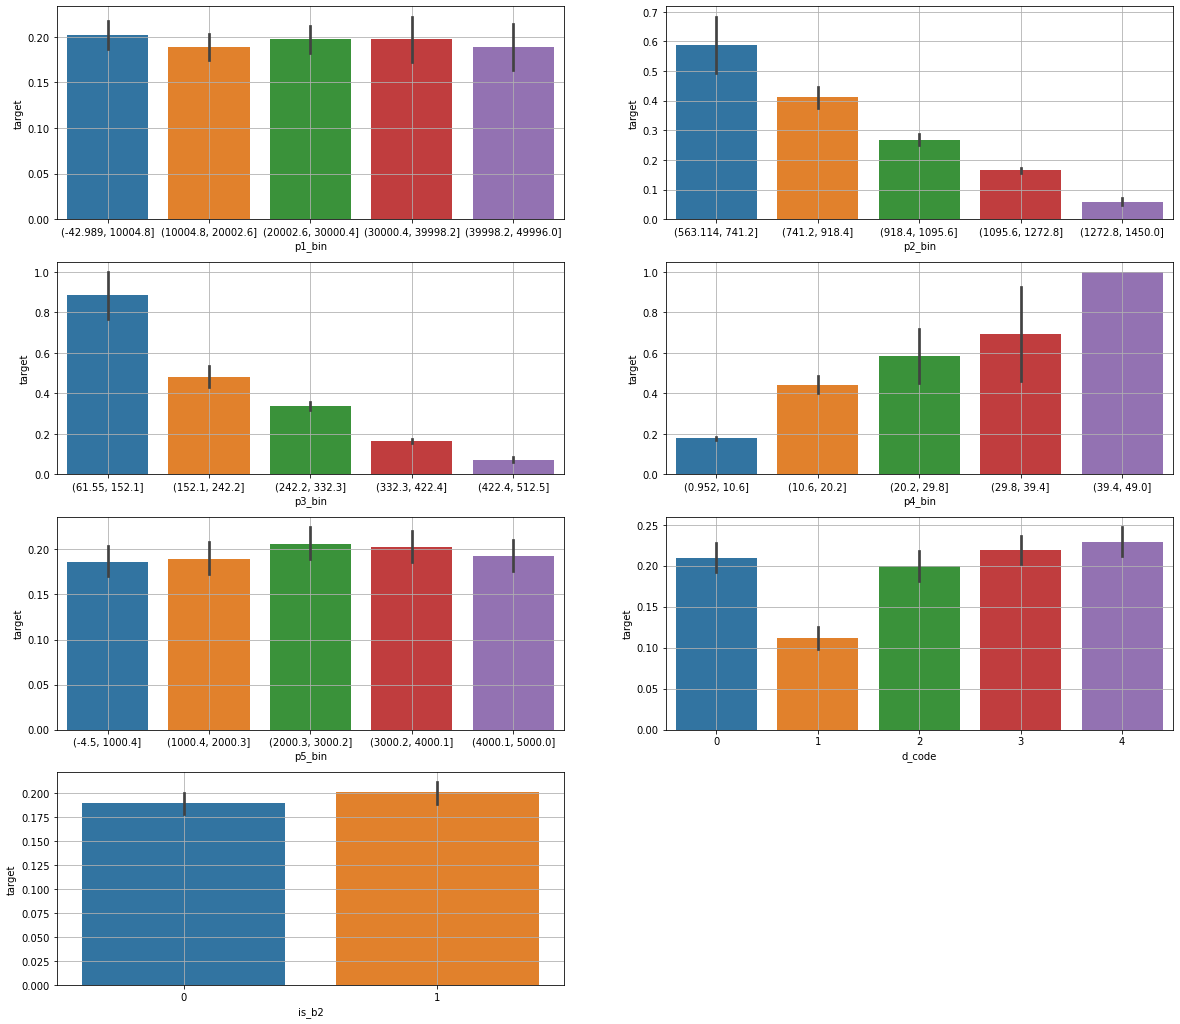

In [114]:
df['p1_bin'] = pd.cut(df['predictor 1'], 5)
df['p2_bin'] = pd.cut(df['predictor 2'], 5)
df['p3_bin'] = pd.cut(df['predictor 3'], 5)
df['p4_bin'] = pd.cut(df['predictor 4'], 5)
df['p5_bin'] = pd.cut(df['predictor 5'], 5)


col_list = ['p1_bin', 'p2_bin', 'p3_bin', 'p4_bin', 'p5_bin', 'd_code', 'is_b2']
fig = plt.figure(figsize=(20, 18))

for i, col_name in enumerate(col_list):
    ax = fig.add_subplot(4, 2, 1 + i)
    g = sns.barplot(x = col_name, y = 'target', data=df, ax = ax)
    ax.grid(True)
plt.show();

### scaler

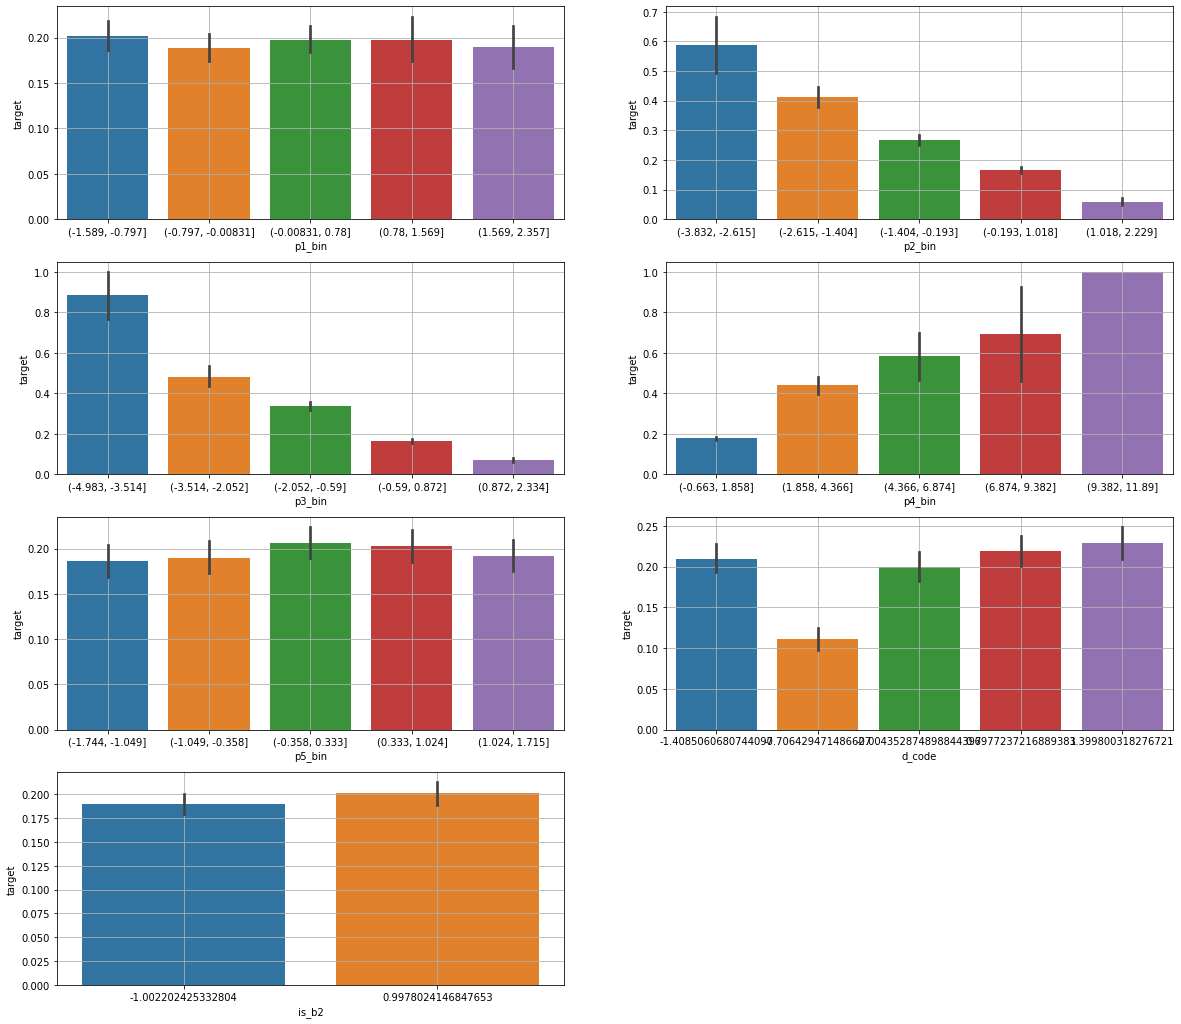

In [115]:
scaler = StandardScaler()
list_ = ['predictor 1', 'predictor 2', 'predictor 3', 'predictor 4', 'predictor 5', 'd_code', 'is_b2']
for i in list_:
    scaler.fit(np.array([df[i]]).reshape(len(df[i]), 1))
    new_data = scaler.transform(np.array([df[i]]).reshape(len(df[i]), 1))
    df[i] = new_data

df['p1_bin'] = pd.cut(df['predictor 1'], 5)
df['p2_bin'] = pd.cut(df['predictor 2'], 5)
df['p3_bin'] = pd.cut(df['predictor 3'], 5)
df['p4_bin'] = pd.cut(df['predictor 4'], 5)
df['p5_bin'] = pd.cut(df['predictor 5'], 5)


col_list = ['p1_bin', 'p2_bin', 'p3_bin', 'p4_bin', 'p5_bin', 'd_code', 'is_b2']
fig = plt.figure(figsize=(20, 18))

for i, col_name in enumerate(col_list):
    ax = fig.add_subplot(4, 2, 1 + i)
    g = sns.barplot(x = col_name, y = 'target', data=df, ax = ax)
    ax.grid(True)
plt.show();

### модели

### 1

In [116]:
features = ['predictor 1', 'predictor 2', 'predictor 3', 'predictor 4', 'predictor 5', 'd_code', 'is_b2']

X, y = df[features], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
# логистическая регрессия
model = LogisticRegression()
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3131
           1       0.14      0.57      0.23       169

    accuracy                           0.81      3300
   macro avg       0.56      0.69      0.56      3300
weighted avg       0.93      0.81      0.86      3300



In [118]:
# случайный лес
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      3075
           1       0.18      0.54      0.27       225

    accuracy                           0.80      3300
   macro avg       0.57      0.68      0.58      3300
weighted avg       0.91      0.80      0.85      3300



In [119]:
# дерево решений
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      2528
           1       0.35      0.30      0.33       772

    accuracy                           0.71      3300
   macro avg       0.58      0.57      0.57      3300
weighted avg       0.69      0.71      0.70      3300



Исходя из задачи, а именно, предсказание дефолта клиента, стоит произвести выбор модели исходя из наилучшего показателя полноты для класса 1 (дефолт наиболее вероятен). Из предложенных трех моделей наилучший результат показала логистическая регрессия (0.57)

### 2

In [120]:
model = LogisticRegression()
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      3131
           1       0.14      0.57      0.23       169

    accuracy                           0.81      3300
   macro avg       0.56      0.69      0.56      3300
weighted avg       0.93      0.81      0.86      3300



Силу каждого предиктора для логистической регрессии можно узнать получив атрибут coef_, для дерева решений и случайного леса необходимо получить атрибут feature_importances_. <br><br>
Построим модель логистической регресси используя только три самых значимых предиктора:

In [121]:
def select_top3_feature(model, features):
    top1, top2, top3 = 0, 0, 0
    mcoef = list(model.coef_[0])
    
    for coef in mcoef:
        if abs(coef) > abs(top1):
            top3 = top2
            top2 = top1
            top1 = coef
        elif abs(coef) > abs(top2):
            top3 = top2
            top2 = coef
        elif abs(coef) > abs(top1):
            top3 = coef
    
    result = [features[mcoef.index(i)] for i in [top1, top2, top3]]
    
    return result

In [122]:
new_features = select_top3_feature(model, features)

print(new_features, "\n" + "-" * 50 + "\n")

X, y = df[new_features], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

['predictor 3', 'predictor 2', 'predictor 1'] 
--------------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      3162
           1       0.11      0.54      0.18       138

    accuracy                           0.80      3300
   macro avg       0.54      0.67      0.54      3300
weighted avg       0.94      0.80      0.86      3300



### 3

In [123]:
class CustomTransformer():
    def __init__(self, model):
        self.model = model
    

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.model.fit(X, y)
        self.top_features = select_top3_feature(self.model, list(X.columns))
        return self


    def transform(self, X):
        self.X = X
        X = self.X[self.top_features]
        return X


In [124]:
pipeline = Pipeline([('custom', CustomTransformer(LogisticRegression())), 
                     ('log_reg', LogisticRegression())])

In [125]:
features = ['predictor 1', 'predictor 2', 'predictor 3', 'predictor 4', 'predictor 5', 'd_code', 'is_b2']
X, y = df[features], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [126]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('custom',
                 <__main__.CustomTransformer object at 0x000001D01A1ACA30>),
                ('log_reg', LogisticRegression())])

In [127]:
pipeline.score(X_test, y_test)

0.8021212121212121